# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

### 1. Import the dataset

In [2]:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
try:
    
    properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None, parse_dates=True)
except:
    print ("Error when loading file: ", sys.exc_info()[0])

### 2. Let's explore the dataset

In [3]:
# what's in it?
properties.axes

[RangeIndex(start=0, stop=309, step=1),
 Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
        'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
        'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
        'Havering', 'Hillingdon', 'Hounslow', 'Islington',
        'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
        'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
        'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
        'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
        'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
        'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
        'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
       dtype='object')]

In [4]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


In [5]:
print (properties['Unnamed: 0'].min(), " - ", properties['Unnamed: 0'].max())

1995-01-01 00:00:00  -  2020-08-01 00:00:00


### 3. Shape the dataset to enable us to answer the question

#### We have house prices by borough, inner/outer london, and regions for the last 25 years and 8 months at a monthly grain (not checked for nulls yet)

The dataset needs to be reduced to contain house prices of the boroughs and without any additional row headers with codes.
We also need to relabel the first column to indicate the date

In [6]:
# Drop the first row as we dont need it, we will not do this inplace to keep the original dataset just incase!
alldata = properties.drop(labels=0, axis=0)
alldata.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9
5,1995-05-01,84409.1,53042.2,90258,63997.1,73704,81542.6,119929,68844.9,82077.1,...,44223.6,44831,45878,50369.7,56479.8,75432,64530.4,54698.8,NaN,53678.2


In [7]:
# relabel the first column as period
alldata.rename(columns={'Unnamed: 0':'Period'}, inplace=True)
alldata.head()

,Period,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9
5,1995-05-01,84409.1,53042.2,90258,63997.1,73704,81542.6,119929,68844.9,82077.1,...,44223.6,44831,45878,50369.7,56479.8,75432,64530.4,54698.8,NaN,53678.2


In [8]:
# Index the dataset by the period column so we can plot and aggregate the rows by different time frames to compute average prices
alldata.set_index('Period', inplace=True)
alldata.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01'],
              dtype='datetime64[ns]', name='Period', length=308, freq=None)

In [9]:
alldata.head()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
Period,,,,,,,,,,,,,,,,,,,,,
1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,72514.7,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,73155.2,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,72190.4,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,71442.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9
1995-05-01,84409.1,53042.2,90258,63997.1,73704,81542.6,119929,68844.9,82077.1,70630.8,...,44223.6,44831,45878,50369.7,56479.8,75432,64530.4,54698.8,NaN,53678.2


In [10]:
# now remove all columns which are not london boroughs
boroughs= alldata.iloc[:,0:33]
boroughs.axes

[DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
                '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
                '1995-09-01', '1995-10-01',
                ...
                '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
                '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
                '2020-07-01', '2020-08-01'],
               dtype='datetime64[ns]', name='Period', length=308, freq=None),
 Index(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent',
        'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
        'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
        'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
        'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
        'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
        'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
       dty

### 4. Explore the dataset

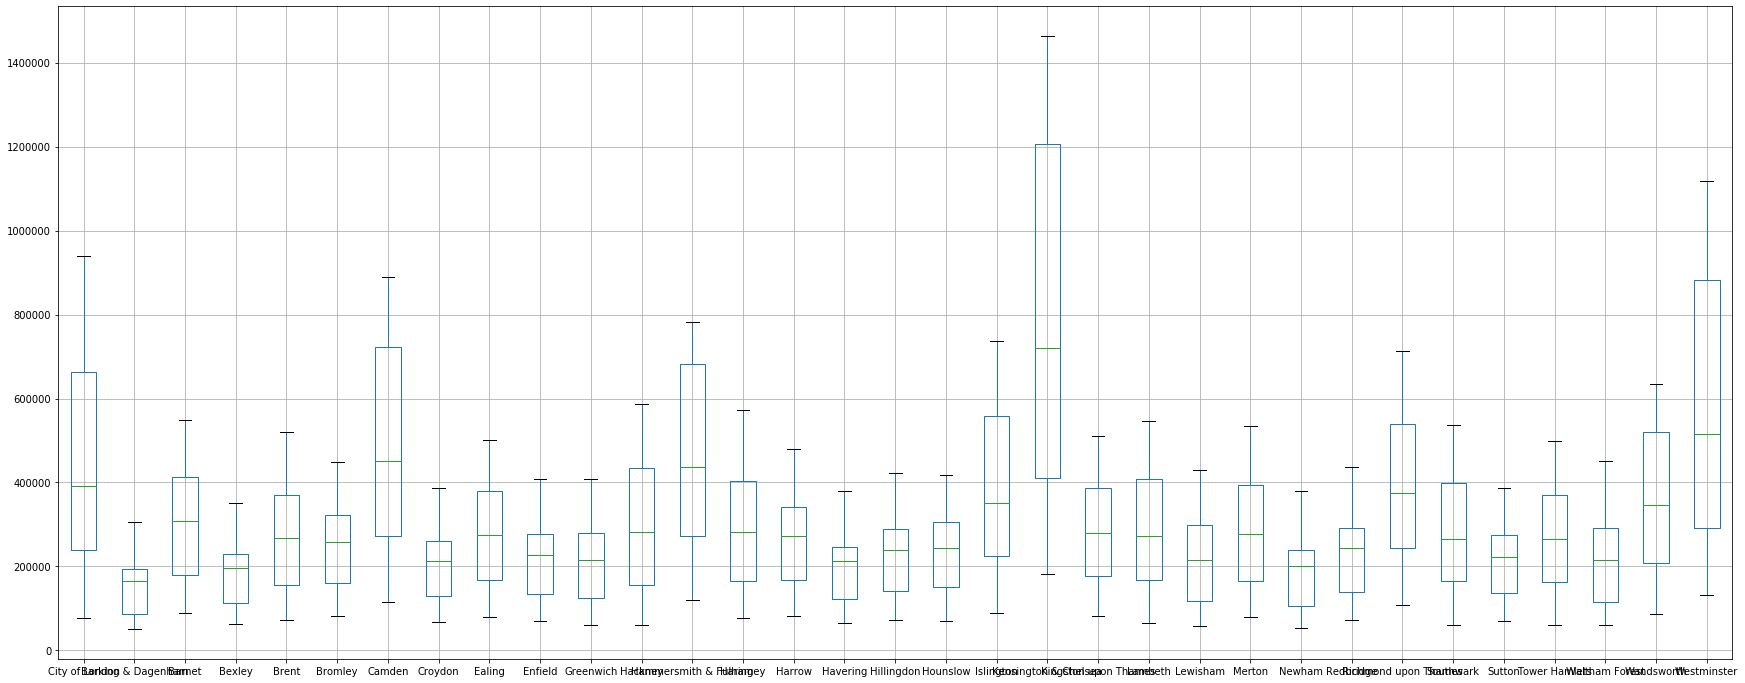

In [11]:
# What do the range of house prices look like for all boroughs - lets use a box plot
boroughs.plot(kind='box', grid=True, figsize=(30,12))
plt.show()

#### It looks like only a handful of boroughs have had a large variance in price over the last two decades. 
But does a wide range imply that these boroughs would be the candidates for the highest price increase? (~this is not a timeseries chart)

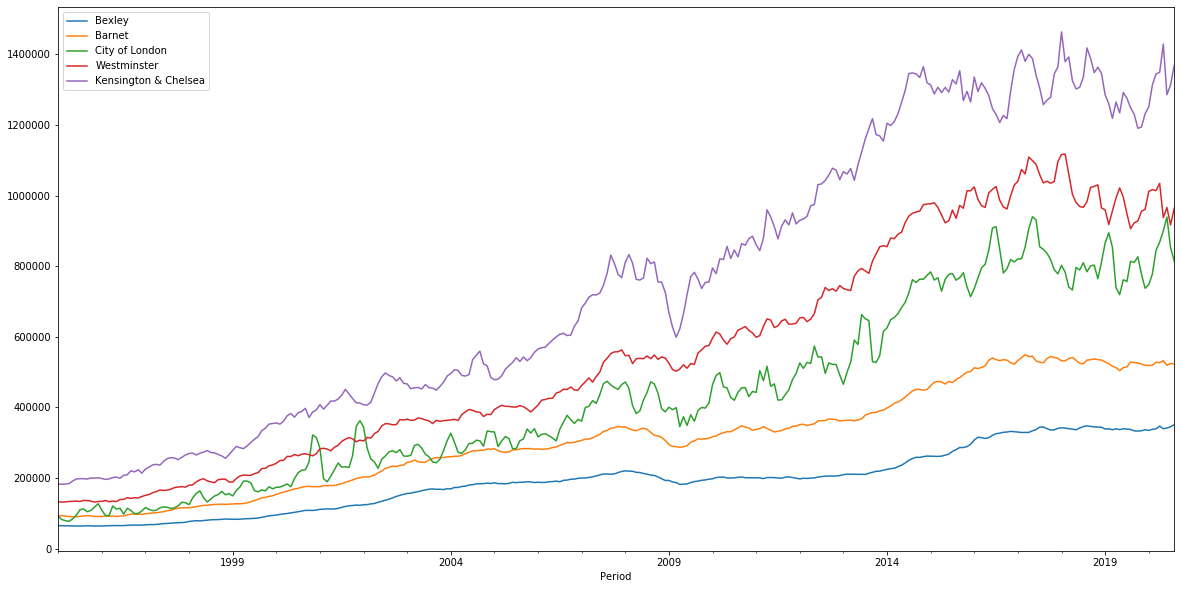

In [12]:
# sample a few boroughs with wide and narrow price ranges and see trend over time 
boroughs[['Bexley','Barnet','City of London','Westminster','Kensington & Chelsea']].plot(kind='line', figsize=(20,10))
plt.show()

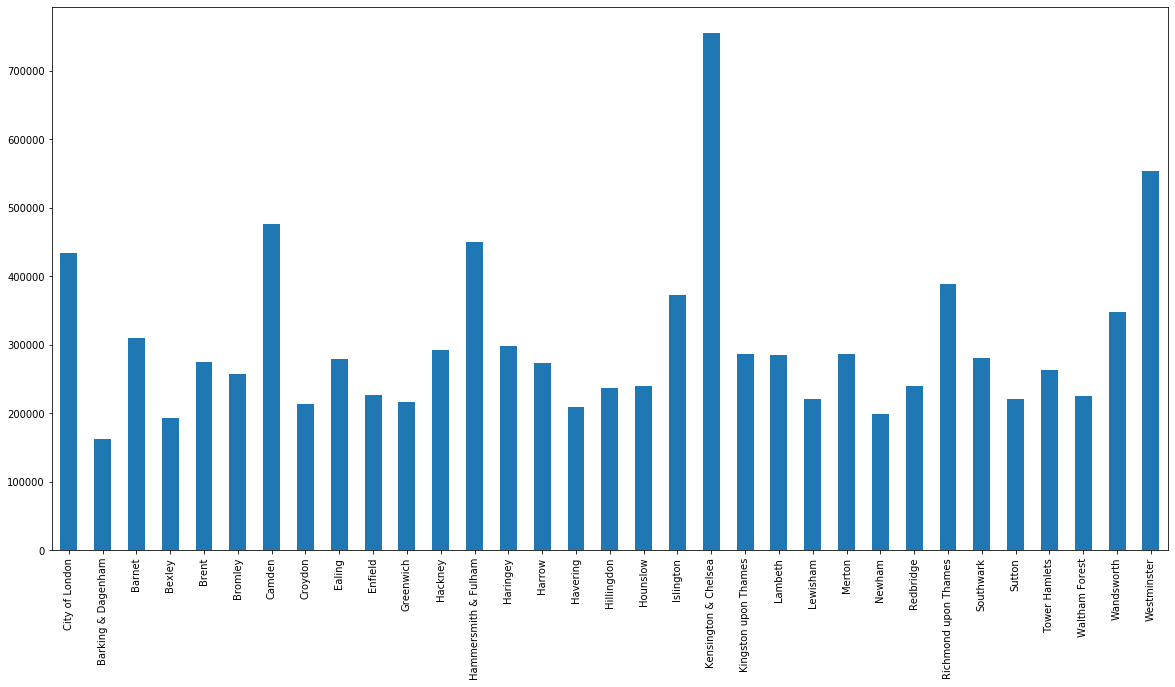

In [13]:
boroughs.mean().plot(kind='bar',figsize=(20,10))
plt.show()

### 5. Resample prices at yearly grain as a base for computing price increases by borough

In [14]:
boroughs.resample('Y').mean().head()

DataError: No numeric types to aggregate

In [15]:
# Calculate highest price in each year for all boroughs
highprices = boroughs.resample('Y').max()
highprices.head()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Period,,,,,,,,,,,,,,,,,,,,,
1995-12-31,127232.4459,53700.34831,93284.51832,64958.09036,74310.48167,82966.33012,125529.8039,69393.50023,82706.65927,73155.19746,...,82070.61330,56067.76986,73275.16891,114656.6011,67885.20344,71536.97357,66432.85846,61933.52738,91373.69840,136581.5082
1996-12-31,120542.7871,53853.51494,97844.45732,66659.34408,78667.10643,86049.25961,147974.3469,72097.39337,86863.01741,76878.71444,...,89153.55339,57576.11585,77309.76851,121988.6045,73855.99726,74370.59186,74419.47098,63710.50127,95215.68994,147407.0456
1997-12-31,131074.4707,58024.95607,115520.86030,74630.05850,94035.60983,100945.28590,168839.3037,83833.86644,105633.80620,89944.71103,...,102798.72070,64175.90510,90666.16410,152620.3633,86214.42205,88380.14065,89546.41759,72405.08185,115954.89190,175551.9834
1998-12-31,163402.8902,63487.53798,125756.67910,83837.91893,104826.91140,112814.00550,176576.4944,91827.85595,114786.09530,95473.58518,...,111213.23290,70575.82682,96575.53827,180444.4459,98302.97736,95480.81832,104182.18970,78115.15176,130162.62570,197805.9810
1999-12-31,191157.4832,68812.20586,149509.80010,93905.37822,123397.58130,131735.48190,210239.9460,107480.19010,141686.99510,110428.19810,...,134375.74940,82366.16022,113057.24700,205018.6366,125224.28370,111886.36300,126650.09630,92190.24552,161755.10970,237074.2685


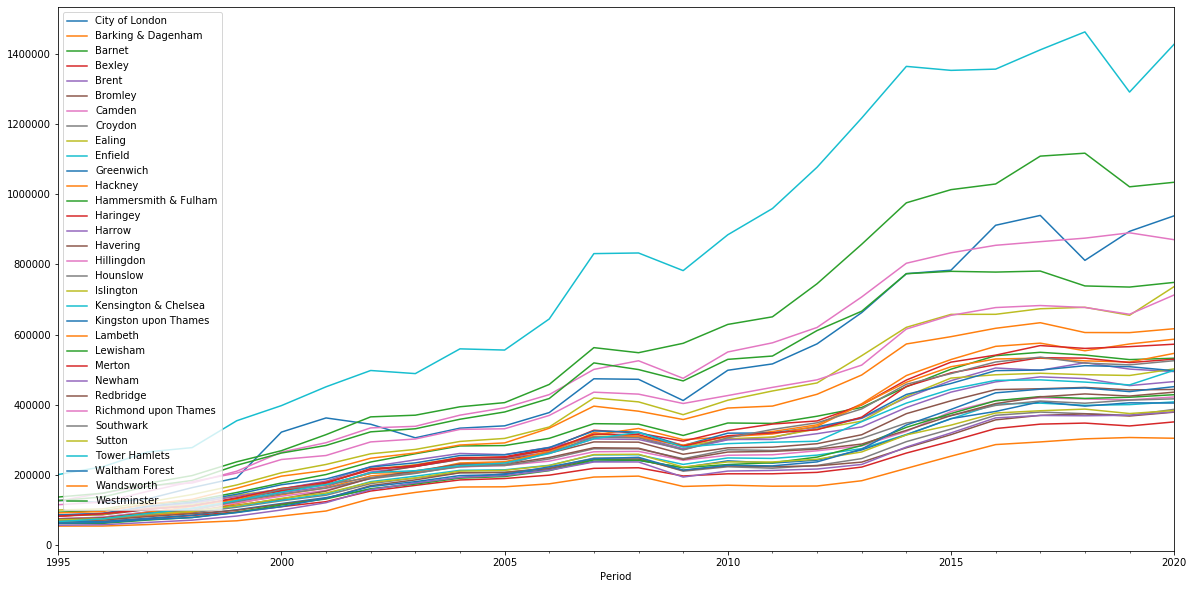

In [16]:
#plot data to sense check 
highprices.plot(kind='line',figsize=(20,10))
plt.show()

### 6. Compute CAGR %

In [17]:
# Apply lambda function that calculates CAGR % 
cagrs = highprices.apply(lambda c: ( (c.iloc[len(c)-1]/c.iloc[0]) ** (1/(len(c))))-1)
cagrs.sort_values(ascending=True, inplace=True)
cagrs.name = 'CAGR%'

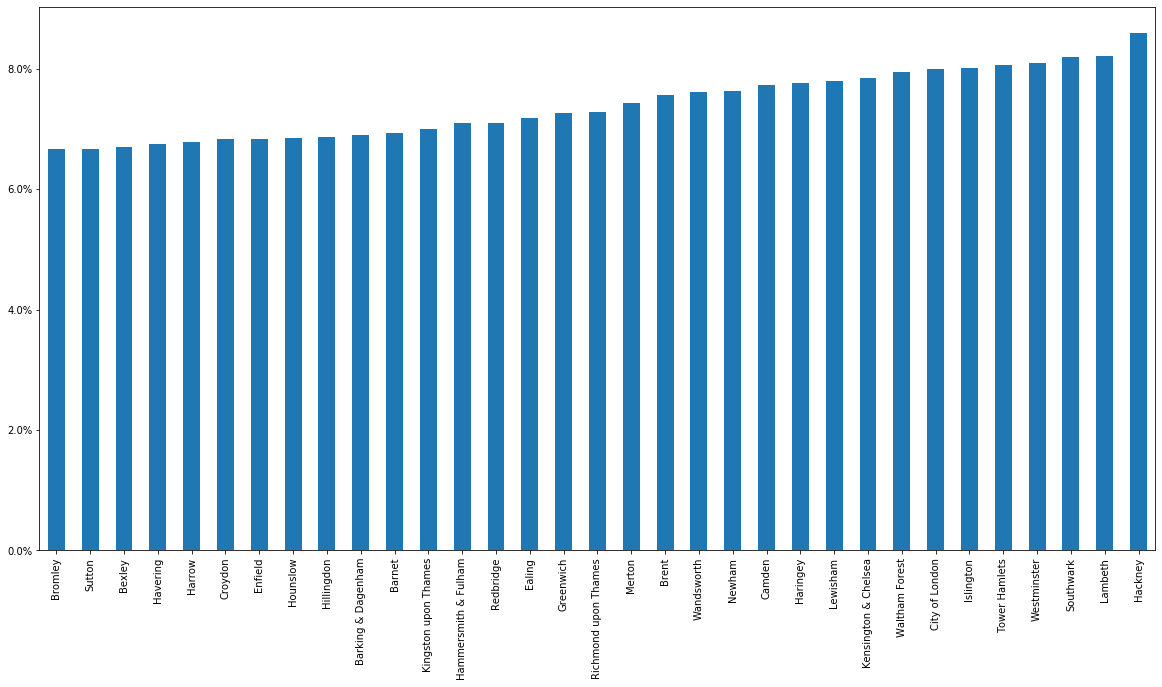

In [18]:
ax = cagrs.plot(kind='bar',figsize=(20,10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

In [19]:
cagrs

Bromley                 0.066594
Sutton                  0.066699
Bexley                  0.067030
Havering                0.067419
Harrow                  0.067740
Croydon                 0.068307
Enfield                 0.068339
Hounslow                0.068465
Hillingdon              0.068690
Barking & Dagenham      0.068986
Barnet                  0.069293
Kingston upon Thames    0.069914
Hammersmith & Fulham    0.070897
Redbridge               0.070978
Ealing                  0.071828
Greenwich               0.072558
Richmond upon Thames    0.072823
Merton                  0.074367
Brent                   0.075615
Wandsworth              0.076204
Newham                  0.076359
Camden                  0.077332
Haringey                0.077537
Lewisham                0.077953
Kensington & Chelsea    0.078401
Waltham Forest          0.079402
City of London          0.079902
Islington               0.080025
Tower Hamlets           0.080577
Westminster             0.080987
Southwark 